In [97]:
import pandas as pd

In [98]:
import numpy as np

In [401]:
train_df = pd.read_csv('TRAIN.csv')

In [402]:
test_df = pd.read_csv('TEST.csv')

In [403]:
train_df.describe()

,age,sex,cp,num
count,736.000000,736.000000,736.000000,736.000000
mean,52.062500,0.744565,3.184783,0.853261
std,9.199314,0.436402,0.949665,1.075486
min,28.000000,0.000000,1.000000,0.000000
25%,45.000000,0.000000,2.000000,0.000000
50%,53.000000,1.000000,4.000000,1.000000
75%,59.000000,1.000000,4.000000,1.000000
max,77.000000,1.000000,4.000000,4.000000


In [404]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [350]:
col_scale = ['trestbps','chol','thalach']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in col_scale:
    scaler = scaler.fit(np.asarray(train_df[col]).reshape(-1,1))
    train_df[col] = scaler.transform(np.asarray(train_df[col]).reshape(-1,1))
    test_df[col] = scaler.transform(np.asarray(test_df[col]).reshape(-1,1))

In [153]:
#for col in ['sex','cp','fbs','restecg','exang']:
 #   print(train_df[col].value_counts())
    
train_df['num'].value_counts()

0    366
1    215
2     70
3     67
4     18
Name: num, dtype: int64

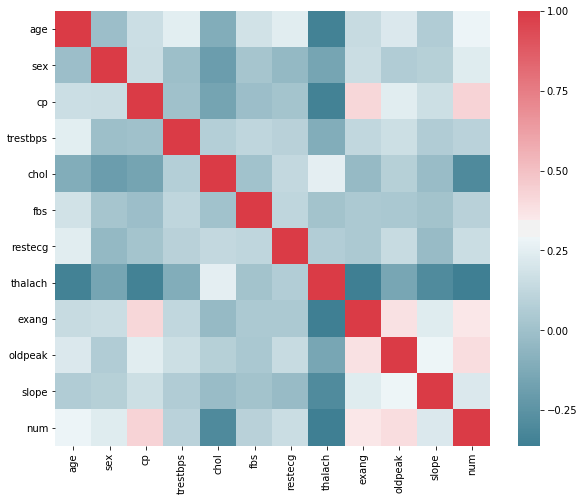

In [149]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as pl

f, ax = pl.subplots(figsize=(10, 8))
corr = train_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [103]:
train_df['num'].value_counts()

0    366
1    215
2     70
3     67
4     18
Name: num, dtype: int64

In [104]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 14 columns):
age         736 non-null float64
sex         736 non-null float64
cp          736 non-null float64
trestbps    736 non-null object
chol        736 non-null object
fbs         736 non-null object
restecg     736 non-null object
thalach     736 non-null object
exang       736 non-null object
oldpeak     736 non-null object
slope       736 non-null object
ca          736 non-null object
thal        736 non-null object
num         736 non-null int64
dtypes: float64(3), int64(1), object(10)
memory usage: 80.6+ KB


In [105]:
test_df.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63.0,1.0,4.0,170,177,0,0,84,1,2.5,3,?,?
1,1,46.0,1.0,4.0,110,236,0,0,125,1,2,2,?,?
2,2,63.0,1.0,4.0,126,0,0,1,120,0,1.5,3,?,?
3,3,60.0,1.0,4.0,152,0,0,1,118,1,0,?,?,7
4,4,58.0,1.0,4.0,116,0,0,0,124,0,1,1,?,?


In [106]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 14 columns):
index       184 non-null int64
age         184 non-null float64
sex         184 non-null float64
cp          184 non-null float64
trestbps    184 non-null object
chol        184 non-null object
fbs         184 non-null object
restecg     184 non-null int64
thalach     184 non-null object
exang       184 non-null object
oldpeak     184 non-null object
slope       184 non-null object
ca          184 non-null object
thal        184 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.2+ KB


In [405]:
train_df.replace('?',np.nan,inplace=True)
test_df.replace('?',np.nan,inplace=True)

In [406]:
cols = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [407]:
for col in cols:
    
    train_df[col] = pd.to_numeric(train_df[col])
    test_df[col] = pd.to_numeric(test_df[col])

In [375]:
to_drop = ['ca','thal']

train_df.drop(to_drop,axis=1,inplace=True)
test_df.drop(to_drop,axis=1,inplace=True)


In [408]:
fills = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope','ca','thal']

In [409]:
for col in fills:
    
    train_df[col].fillna(-1,inplace=True)
    test_df[col].fillna(-1,inplace=True)
    

In [410]:
X = train_df.drop(['num'],axis=1) 

y = train_df['num']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [411]:
from xgboost import XGBClassifier

In [412]:
clf = XGBClassifier(n_estimators=700,max_depth=3)

In [413]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=700,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [414]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.62962962963


In [420]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300,max_depth=2)
rf.fit(X_train,y_train)


y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.633744855967


In [416]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=5,learning_rate=0.5)
ada.fit(X_train,y_train)


y_pred = ada.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.625514403292


In [417]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight={0:0.1,1:0.1,2:0.25,3:0.25,4:0.3})
lr = LogisticRegression(penalty='l2',max_iter=50)

lr.fit(X_train,y_train)


y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.637860082305


In [303]:
lr.fit(X,y)

LogisticRegression(C=1.0,
          class_weight={0: 0.1, 1: 0.1, 2: 0.25, 3: 0.25, 4: 0.3},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)

In [280]:
gnb.class_count_

array([ 245.,  144.,   47.,   45.,   12.])

In [385]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB(priors=[0.15,0.15,0.2,0.2,0.3]).fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.497942386831


In [248]:
y.shape

(736,)

In [428]:
gnb.fit(X,y)
clf.fit(X,y)
rf.fit(X,y)
ada.fit(X,y)


from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier(n_estimators=500,max_depth=3)
clf = XGBClassifier(n_estimators=1000,max_depth=3)
#gnb = GaussianNB(priors=[0.3,0.3,0.15,0.15,0.1]) 
#gnb = GaussianNB(priors=[0.45,0.45,0.05,0.05,0.0]) 
#ada = AdaBoostClassifier(n_estimators=5,learning_rate=0.5)
lr = LogisticRegression(penalty='l2',max_iter=50)

eclf1 = VotingClassifier(estimators=[('xg', clf), ('rf', rf), ('lr',lr)], voting='hard')

eclf1 = eclf1.fit(X, y)

In [422]:
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier(n_estimators=300,max_depth=6)
clf = XGBClassifier(n_estimators=100,max_depth=3)
#gnb = GaussianNB(priors=[0.45,0.45,0.05,0.05,0.0]) 
ada = AdaBoostClassifier(n_estimators=5,learning_rate=0.5)
lr = LogisticRegression()

eclf1 = VotingClassifier(estimators=[('xg', clf), ('rf', rf), ('gnb', gnb), ('ada',ada),('lr',lr)], voting='hard')

eclf1 = eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test) 

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.633744855967


In [304]:
index = test_df['index']
test = test_df.drop(['index'],axis=1)
y_out = lr.predict(test)

df_sub = pd.DataFrame(data=y_out,index=index)

df_sub.head()

df_sub.to_csv('sub.csv')

In [429]:
index = test_df['index']
test = test_df.drop(['index'],axis=1)
y_out = eclf1.predict(test)

df_sub = pd.DataFrame(data=y_out,index=index)

df_sub.head()

df_sub.to_csv('sub.csv')

In [155]:
index = test_df['index']
test = test_df.drop(['index'],axis=1)
y = gnb.predict(test)

df_sub = pd.DataFrame(data=y,index=index)

df_sub.head()

df_sub.to_csv('sub.csv')

/home/arrayslayer/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:431: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])


In [421]:
rf.fit(X,y)
index = test_df['index']
test = test_df.drop(['index'],axis=1)
y_out = rf.predict(test)

df_sub = pd.DataFrame(data=y_out,index=index)

df_sub.head()

df_sub.to_csv('sub.csv')

In [34]:
index = test_df['index']
test = test_df.drop(['index'],axis=1)
y = clf.predict(test)

df_sub = pd.DataFrame(data=y,index=index)

df_sub.head()

df_sub.to_csv('sub.csv')

In [49]:
# rf 0.66 eval 1000,2 got 0.33695 on LB